Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import re 
import tensorflow as tf
import seaborn as sns
# Load Text Cleaning Pkgs
import neattext.functions as nfx
import matplotlib as plt
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression

# Transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

2023-06-18 15:21:30.636679: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 15:21:30.752187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 15:21:30.752984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 15:21:31.485344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Reeading CSV file 
data = pd.read_csv("/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Exit Test/tweet_emotions .csv")

In [3]:
# deading first 20 data
data.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [4]:
# list the columns
data.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [5]:
# Checking any null values present
data.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [6]:
# more details of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [7]:
# rows and columns
data.shape

(40000, 3)

In [8]:
# Value Counts
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='count', ylabel='sentiment'>

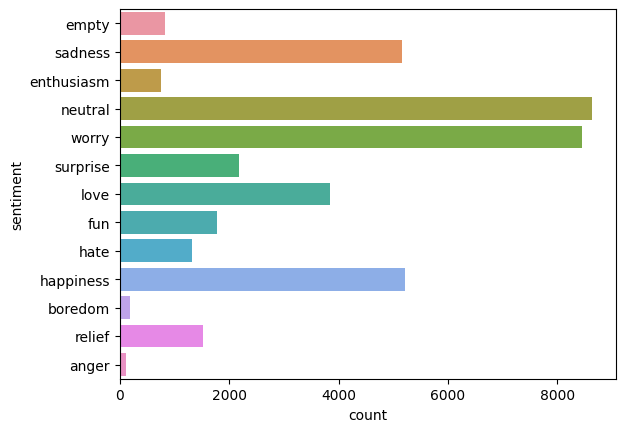

In [9]:
# Plot
sns.countplot(y='sentiment',data=data)

In [10]:
# Map sentiments to emotional categories
emotion_mapping = {
    'empty': 'neutral',
    'sadness': 'sadness',
    'enthusiasm': 'joy',
    'neutral': 'neutral',
    'worry': 'fear',
    'surprise': 'surprise',
    'love': 'joy',
    'fun': 'joy',
    'hate': 'anger',
    'happiness': 'joy',
    'boredom': 'neutral',
    'relief': 'joy',
    'anger': 'anger'
}
data['emotion'] = data['sentiment'].map(emotion_mapping)
data.head(25)

,tweet_id,sentiment,content,emotion
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness


In [11]:
# removes pattern in the input text
# This function works to remove certain patterns in the text for preprocessing

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
# remove @user symbols

data['cleaned_content'] = np.vectorize(remove_pattern)(data['content'], "@[\w]*")

In [12]:
# Define the label mapping
label_mapping = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'surprise': 4, 'neutral': 5}

# Map the emotions to their numerical representation
data['emotion_label'] = data['emotion'].map(label_mapping)

In [13]:
# # Data Cleaning
# dir(nfx)

In [14]:
# User handles
data['cleaned_content'].apply(nfx.remove_userhandles)

0         i know  i was listenin to bad habit earlier a...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4         We want to trade with someone who has Houston...
                               ...                        
39995                                                     
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998     WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY ...
39999     bullet train from tokyo    the gf and i have ...
Name: cleaned_content, Length: 40000, dtype: object

In [15]:
data.head(20)

,tweet_id,sentiment,content,emotion,cleaned_content,emotion_label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,i know i was listenin to bad habit earlier a...,5
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,wants to hang out with friends SOON!,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,We want to trade with someone who has Houston...,5
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear,Re-pinging : why didn't you go to prom? BC my ...,3
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness,"I should be sleep, but im not! thinking about ...",1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear,Hmmm. http://www.djhero.com/ is down,3
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness,Charlene my love. I miss you,1
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness,I'm sorry at least it's Friday?,1


In [16]:
# download nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/ihsan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ihsan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ihsan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_text = [word for word in tokens if word not in stop_words]


    # Join the tokens back into a single string
    cleaned_text = " ".join(filtered_text)

    return cleaned_text


In [18]:
data['cleaned_content'].apply(clean_text)

0        know wa listenin bad habit earlier started fre...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4                 want trade someone ha houston ticket one
                               ...                        
39995                                                     
39996                                happy mother day love
39997    happy mother day mommy woman man long youre mo...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: cleaned_content, Length: 40000, dtype: object

In [19]:
data.head(20)

,tweet_id,sentiment,content,emotion,cleaned_content,emotion_label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,i know i was listenin to bad habit earlier a...,5
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,wants to hang out with friends SOON!,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,We want to trade with someone who has Houston...,5
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear,Re-pinging : why didn't you go to prom? BC my ...,3
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness,"I should be sleep, but im not! thinking about ...",1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear,Hmmm. http://www.djhero.com/ is down,3
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness,Charlene my love. I miss you,1
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness,I'm sorry at least it's Friday?,1


In [20]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['cleaned_content'], data['emotion_label'], test_size=0.2, random_state=42)

In [21]:
# Print the preprocessed train label
print(train_labels.head())

14307    5
17812    0
11020    3
15158    2
24990    4
Name: emotion_label, dtype: int64


In [22]:
# Print the preprocessed train data
print(train_data.head())

14307            Thundershowers plus baseball equals awwww
17812    The Hangover: That movie is gonna be hilarious...
11020    Playing some games before I leave for work   W...
15158    About to be stick at work till freakin 2 am.  ...
24990     u mean jack barakat's?! wow so have u ever go...
Name: cleaned_content, dtype: object


Feature Engineering

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

In [24]:
# Initialize the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [25]:
# Fit and transform the training data
train_bow = count_vectorizer.fit_transform(train_data)
train_tfidf = tfidf_vectorizer.fit_transform(train_data)

In [26]:
# Transform the testing data
test_bow = count_vectorizer.transform(test_data)
test_tfidf = tfidf_vectorizer.transform(test_data)

In [27]:
# Concatenate the feature matrices
train_features = hstack([train_bow, train_tfidf])
test_features = hstack([test_bow, test_tfidf])

Model and Evaluation

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [29]:
# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

In [30]:
# Train the classifier
classifier.fit(train_features, train_labels)

MultinomialNB()

In [31]:
# Make predictions
predictions = classifier.predict(test_features)

In [32]:

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

In [33]:

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.4345
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.82      0.61      2643
           1       0.36      0.08      0.13      1046
           2       0.50      0.01      0.03       287
           3       0.35      0.48      0.41      1666
           4       0.25      0.00      0.00       425
           5       0.43      0.22      0.29      1933

    accuracy                           0.43      8000
   macro avg       0.40      0.27      0.24      8000
weighted avg       0.41      0.43      0.37      8000



CNN

In [34]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [35]:
# Reshape the feature matrices
train_features = np.expand_dims(train_features.toarray(), axis=2)
test_features = np.expand_dims(test_features.toarray(), axis=2)

MemoryError: Unable to allocate 13.4 GiB for an array with shape (32000, 56126) and data type float64

In [ ]:
#Define CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_features.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

2023-06-18 14:30:24.533221: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 919535616 exceeds 10% of free system memory.
2023-06-18 14:30:24.840237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 919535616 exceeds 10% of free system memory.
2023-06-18 14:30:25.077124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 919535616 exceeds 10% of free system memory.


In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)


Epoch 1/10


ValueError: in user code:

    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/ihsan/.local/lib/python3.10/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


LSTM

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [41]:
# Define LSTM model
# model = Sequential()
# model.add(LSTM(units=128, input_shape=(train_features.shape[1], train_features.shape[2])))
# model.add(Dense(units=6, activation='softmax'))

In [39]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
# Train the model
# model.fit(train_features, train_labels, epochs=10, batch_size=32)


In [ ]:
#Evaluvate the model
loss, accuracy = model.evaluate(test_features, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)